In [ ]:
# !pip install wordcloud
!pip install spellchecker
# !pip install mutagen
# import pandas as pd
# import os
# import librosa as lbs
# import numpy as np
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from mutagen.mp3 import MP3
# import seaborn as sbn
# import pandas as pd
from spellchecker import SpellChecker


In [10]:
# A. Data Load
# Load the dataset as CSV file 
# audio = C:\Users\User\.cache\huggingface\datasets\downloads\extracted
df = pd.read_csv('D:/CommonVoice/CommonVoiceDf.csv') 

(205390, 10)

In [16]:
# B. Exploratory Data Analysis
# Information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205390 entries, 0 to 205389
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   client_id   205390 non-null  object 
 1   path        205390 non-null  object 
 2   sentence    205389 non-null  object 
 3   up_votes    205390 non-null  int64  
 4   down_votes  205390 non-null  int64  
 5   age         119912 non-null  object 
 6   gender      121180 non-null  object 
 7   accents     0 non-null       float64
 8   locale      205390 non-null  object 
 9   segment     0 non-null       float64
dtypes: float64(2), int64(2), object(6)
memory usage: 15.7+ MB


In [17]:
df.shape

(205390, 10)

In [18]:
# Get column names
column_names = df.columns.tolist()
print(column_names)

['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accents', 'locale', 'segment']


In [19]:
df.describe()

,up_votes,down_votes,accents,segment
count,205390.000000,205390.000000,0.0,0.0
mean,0.879546,0.258708,NaN,NaN
std,0.899450,0.570420,NaN,NaN
min,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,NaN,NaN
50%,1.000000,0.000000,NaN,NaN
75%,2.000000,0.000000,NaN,NaN
max,6.000000,6.000000,NaN,NaN


In [39]:
# Get the distribution of duration audiofiles
audioFilePath = 'D:/cache' 
def getDuration(path):
    file_path = os.path.join(audioFilePath, path)  # Construct full file path
    try:
        # Load the audio file using mutagen
        audio = MP3(file_path)
        duration = audio.info.length  # Get duration in seconds
        return duration
    except Exception as e:
        return None
        
# Apply the function to the 'path' column
df['duration'] = df['path'].apply(getDuration)

In [41]:
# Duration statistics
print(df['duration'].describe())

count    205390.000000
mean          4.123377
std           1.644871
min           0.648000
25%           2.880000
50%           3.888000
75%           5.076000
max          22.176000
Name: duration, dtype: float64


In [49]:
# Check if all durations donot need be rounded only truncate decimals 
print(df['duration'].iloc[54:64])
print(df['path'].iloc[54:64])
# Transform to int, truncate decimals 
df['duration'] = df['duration'].apply(lambda x: int(x))
df['duration'].head()

0    4
1    5
2    4
3    7
4    5
Name: duration, dtype: int64

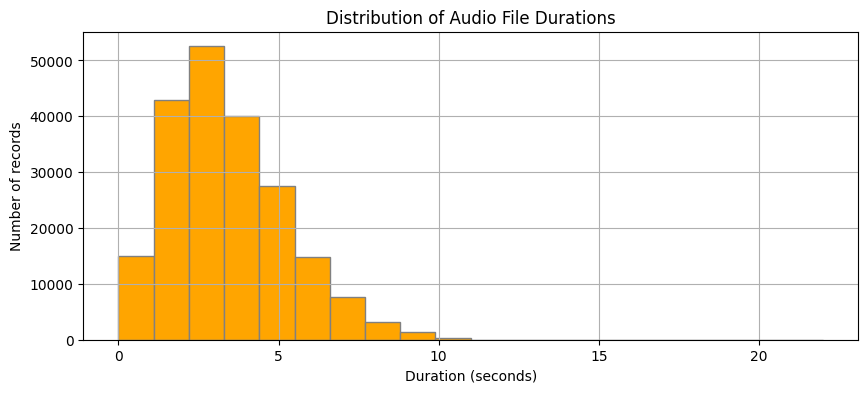

In [143]:
# Duration statistics
plt.figure(figsize=(10, 4))
plt.hist(df['duration'], bins=20, color='orange', edgecolor='gray')
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of records')
plt.grid()
plt.show()

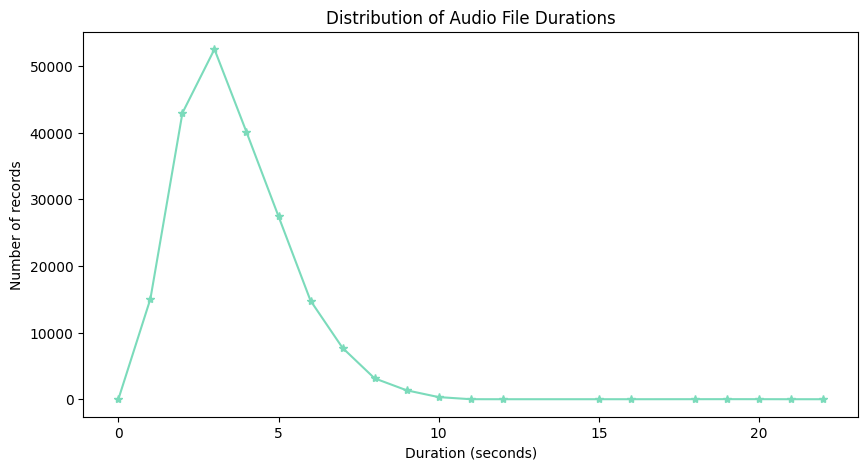

In [145]:
plt.figure(figsize=(10, 5))
df['duration'].value_counts().sort_index().plot(marker='*', color='#7BDBBB')
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of records')
plt.show()

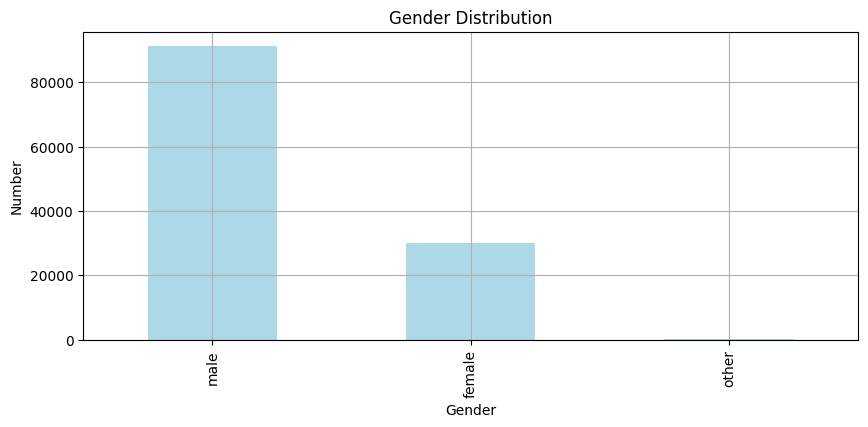

In [150]:
# Plots for age distribution    
plt.figure(figsize=(10, 4))
df['gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number')
plt.grid()
plt.show()

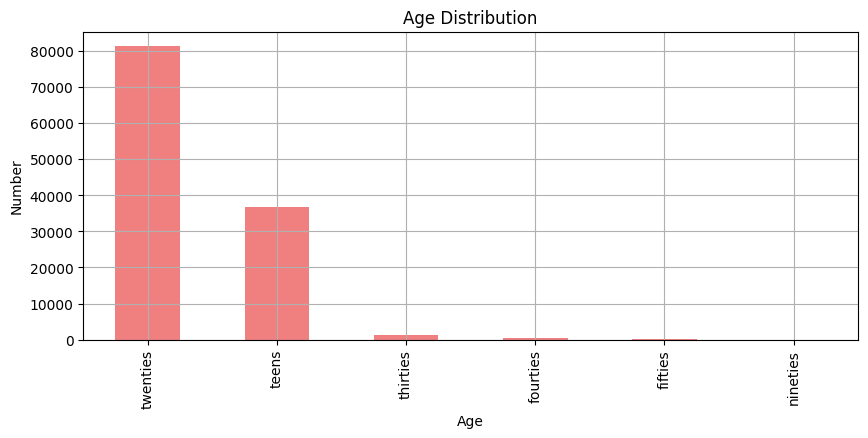

In [149]:
# Plots for gender disruibution
plt.figure(figsize=(10, 4))
df['age'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.grid()
plt.show()

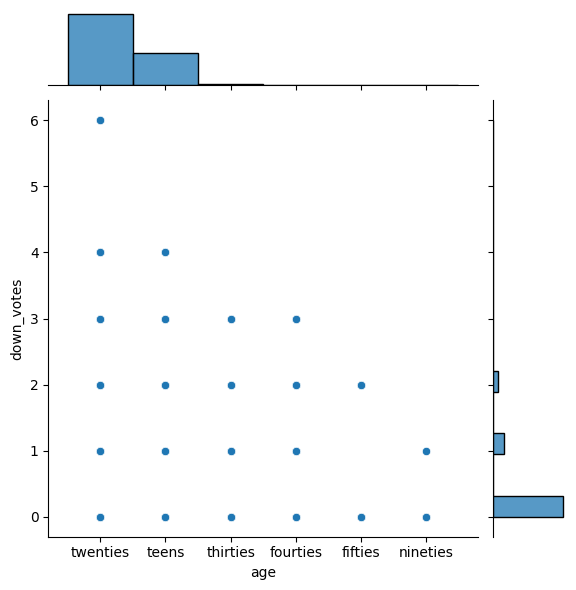

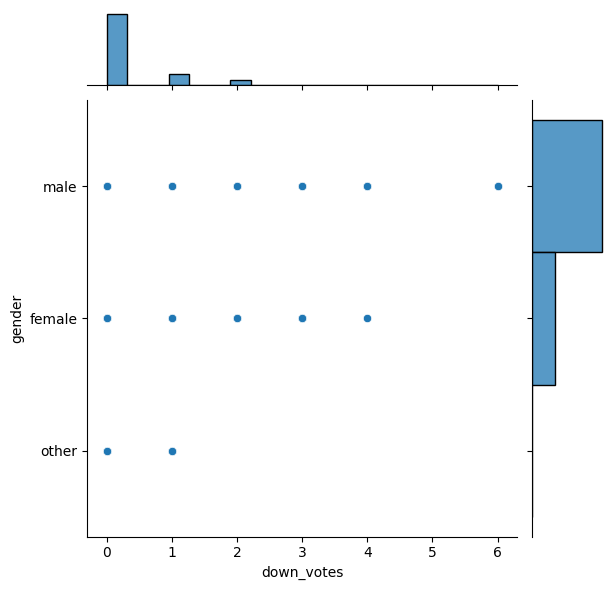

In [164]:
#Relationships between age/gender and up_votes/down_votes, duration and age/gender, duration and up_votes/down_votes
sbn.jointplot(y=df['down_votes'],x=df['age'])
sbn.jointplot(x=df['down_votes'],y=df['gender'])
sbn.jointplot(y=df['duration'],x=df['age'])
sbn.jointplot(x=df['duration'],y=df['gender'])

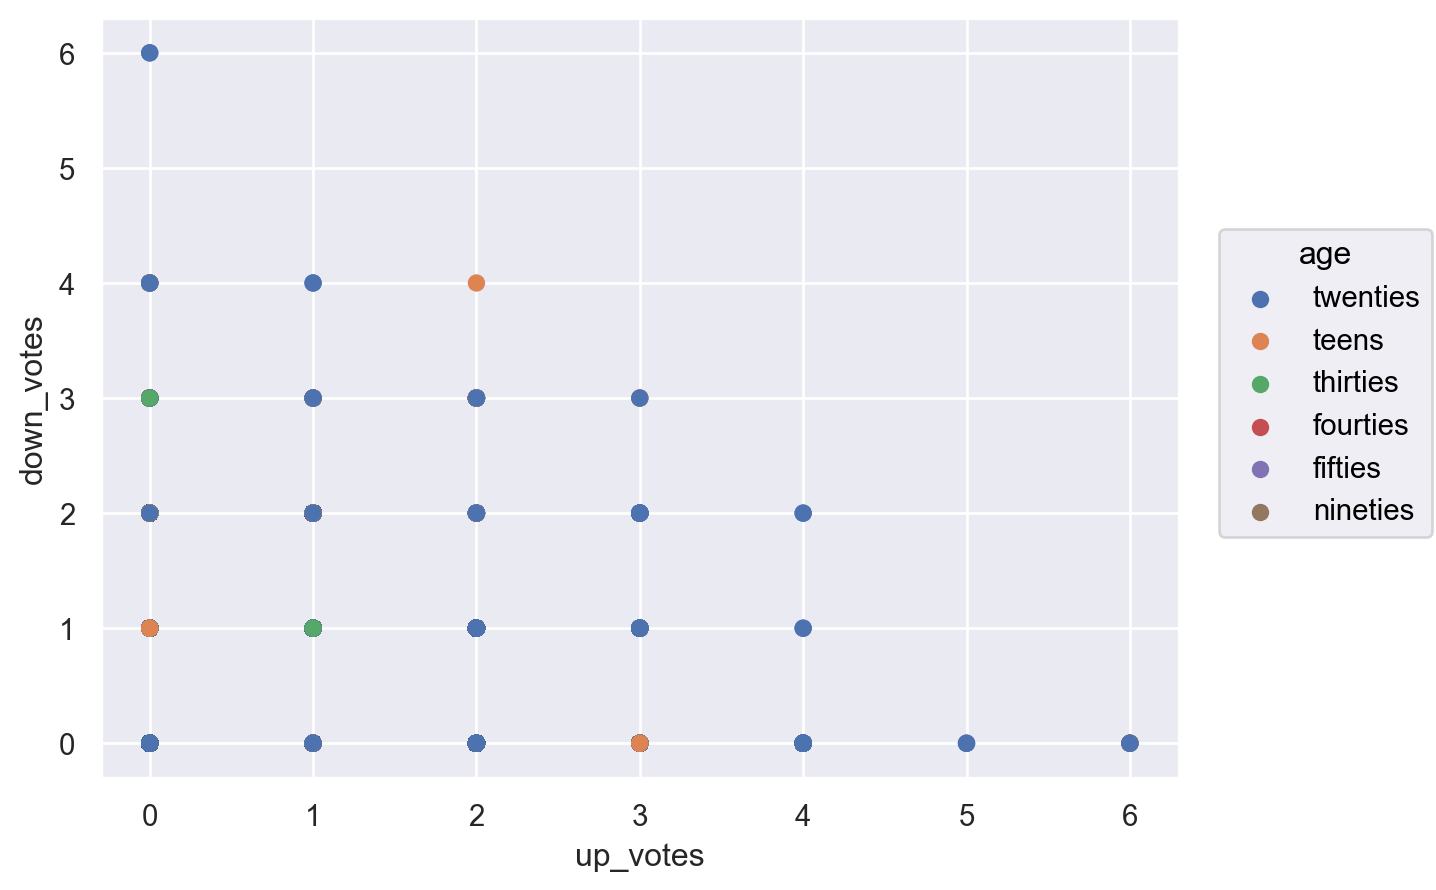

In [169]:
import seaborn.objects as so
(
    so.Plot(
        df, x="up_votes", y="down_votes",
        color="age"
    )
    .add(so.Dot())
)

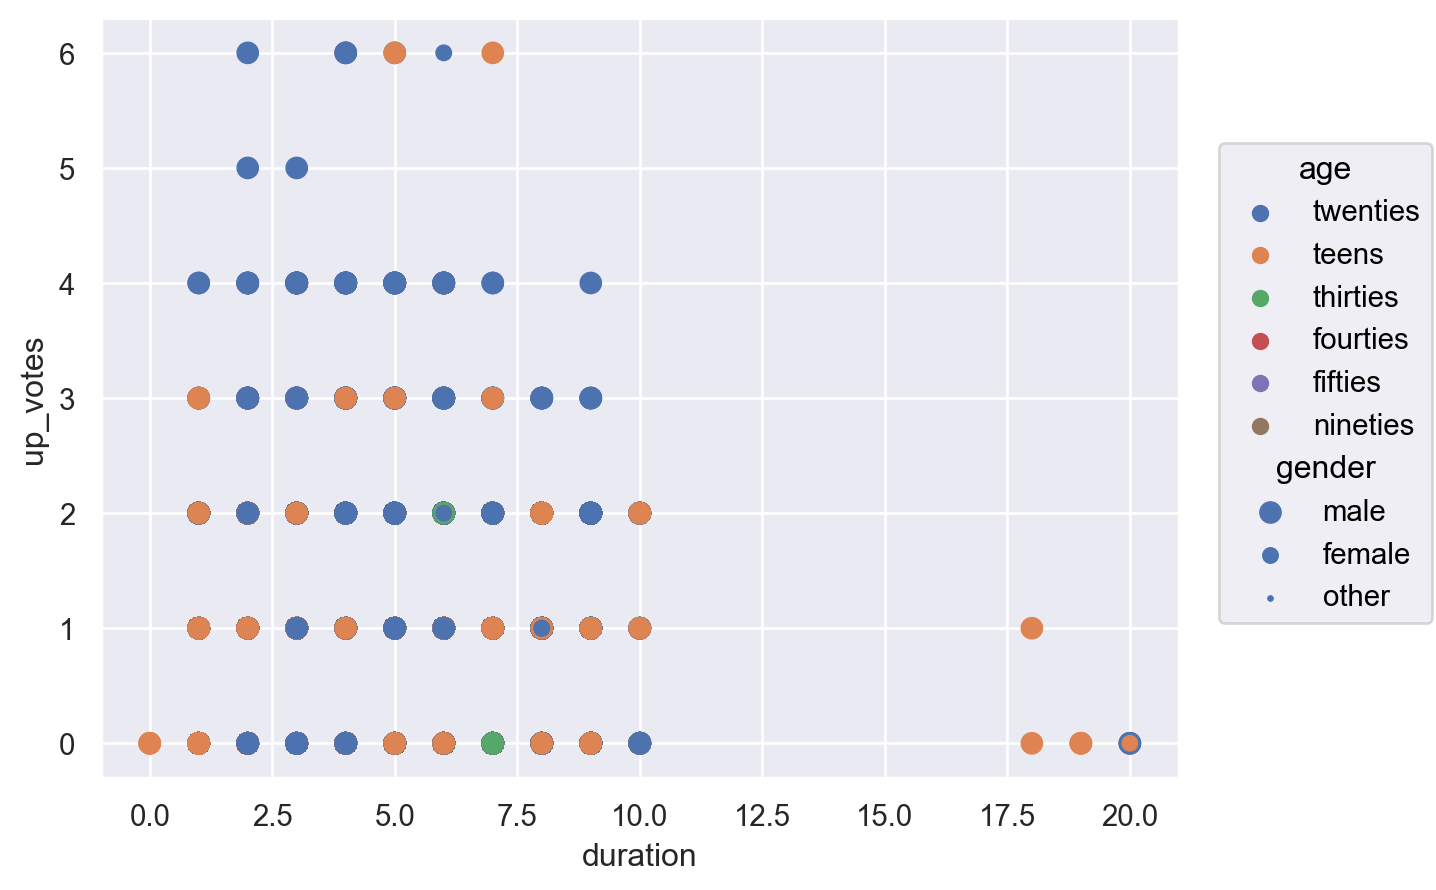

In [177]:
(
    so.Plot(
        df, x="duration", y="up_votes",
        color="age", pointsize="gender"
    )
    .add(so.Dot())
)

In [211]:
# Worlds length
df['sentence'] = df['sentence'].astype(str) #Change column sentence type to string 
all_sentences = " ".join(df['sentence']) # Join all rows of column sentence  
all_words = set(all_sentences.split()) # Transorm to set for unique values and split by space 
print(f'Vocabulary Size: {len(all_words)}')
print(all_words)

# Print the unique words from the 'sentence' column
print(all_words)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



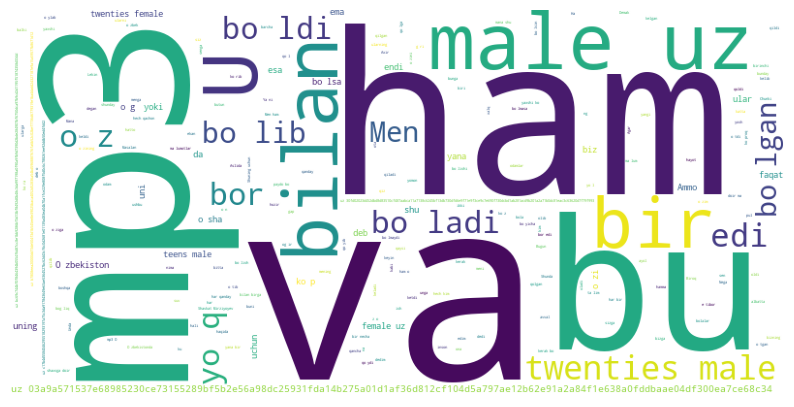

In [213]:
# # Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

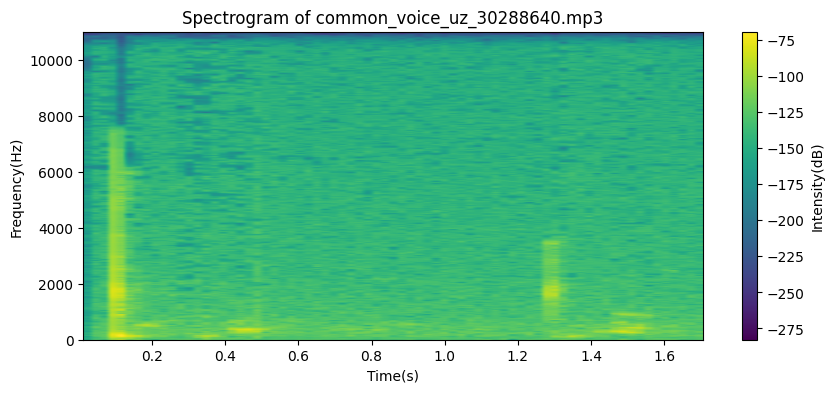

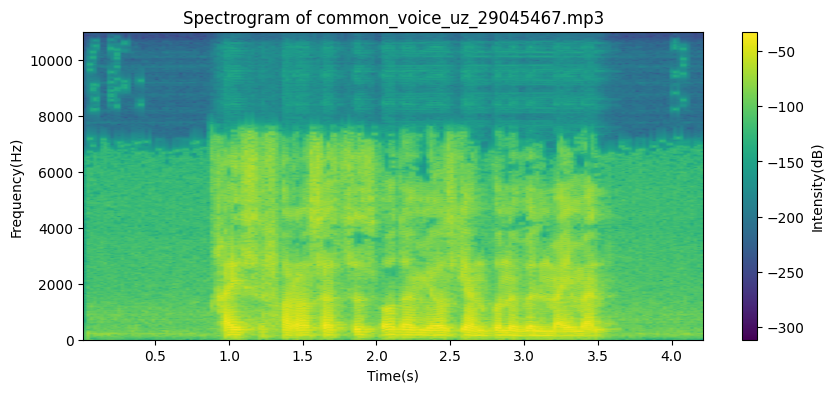

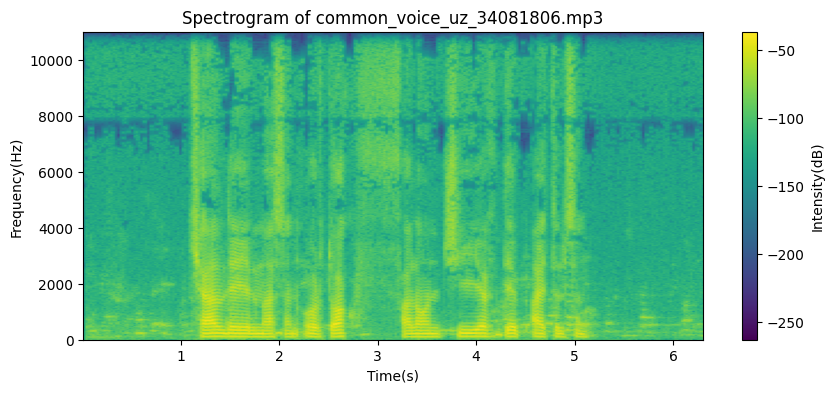

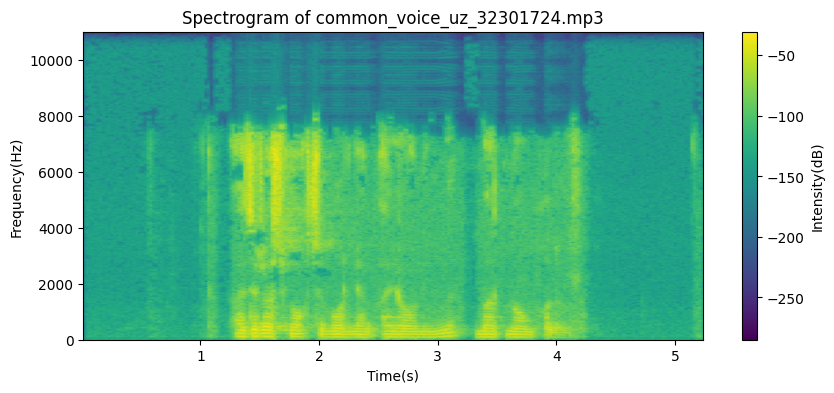

In [225]:
# Spectrograms
random_audio = df['path'].sample(n=4).values

for x in random_audio:
    audio_file_path = os.path.join('D:/cache', x)
    audio, sr = lbs.load(audio_file_path)
    plt.figure(figsize=(10, 4))
    plt.specgram(audio, Fs=sr, NFFT=1024, noverlap=512)
    plt.title(f'Spectrogram of {x}')
    plt.xlabel('Time(s)')
    plt.ylabel('Frequency(Hz)')
    plt.colorbar(label='Intensity(dB)')
    plt.show()

In [261]:
# Data quality assurance
# Check for NA rows in sentence(transcription)
empty = df.isna().sum()
print(f'Number of NA rows: {empty}')
# df['sentence'].dropna() #Drop row with missing sentence 
# print(empty)
# If we do not need columns with fully Na rows(accents) we can drop column. I tried many times but column "accents" did not 
# show values(exist in the csv file)when reading file pandas
# df = df.drop('accents', axis=1)

Number of NA rows: client_id          0
path               0
sentence           0
up_votes           0
down_votes         0
age            85478
gender         84210
accents       205390
locale             0
segment       205390
duration           0
tokens             0
dtype: int64


In [ ]:
# Check for NA results in audio files
missing_audio = df[~df['path'].isin(os.listdir('D:/cache'))]

In [226]:
# Check for duplicat rows
duplicates = df.duplicated()
print(f'Number of duplicated rows: {duplicates.sum()}')
df.drop_duplicates()

Number of duplicate rows: 0


In [ ]:
def correct_sentence(text):
    spell = SpellChecker()
    words = text.split()
    corrected_words = [spell.candidates(word).pop() if spell.unknown([word]) else word for word in words]
    return " ".join(corrected_words)

# Apply the correction to the 'sentence' column
df['corrected_sentence'] = df['sentence'].apply(correct_transcription)

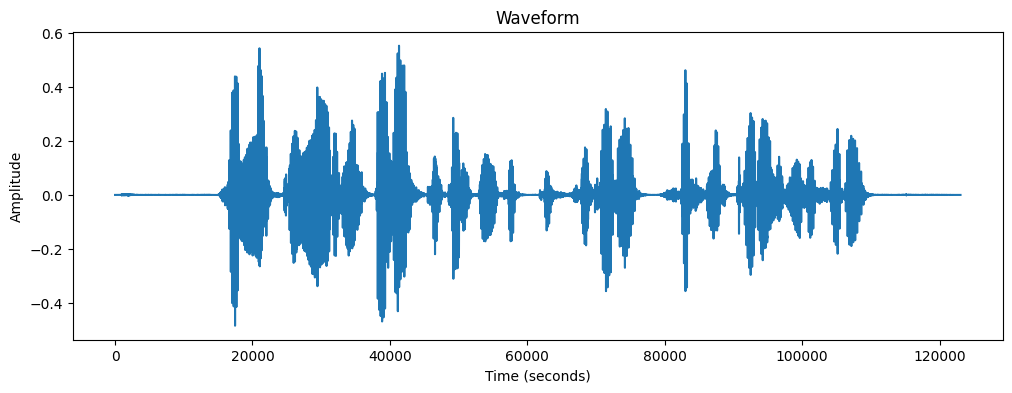

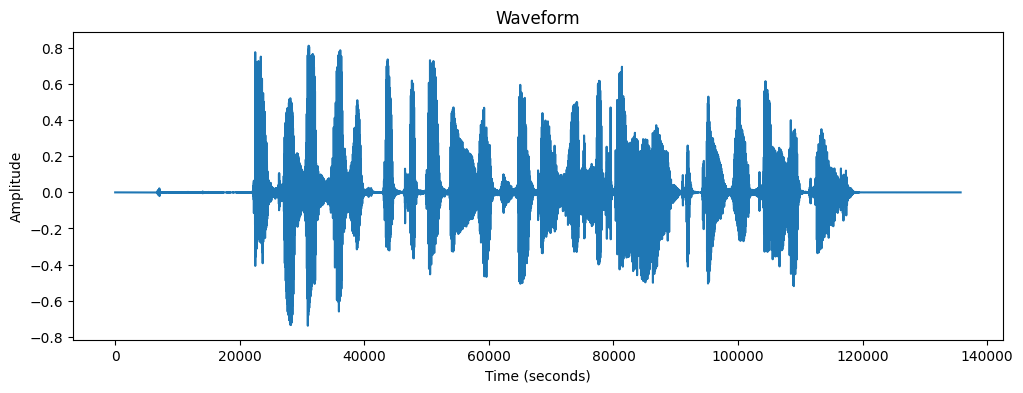

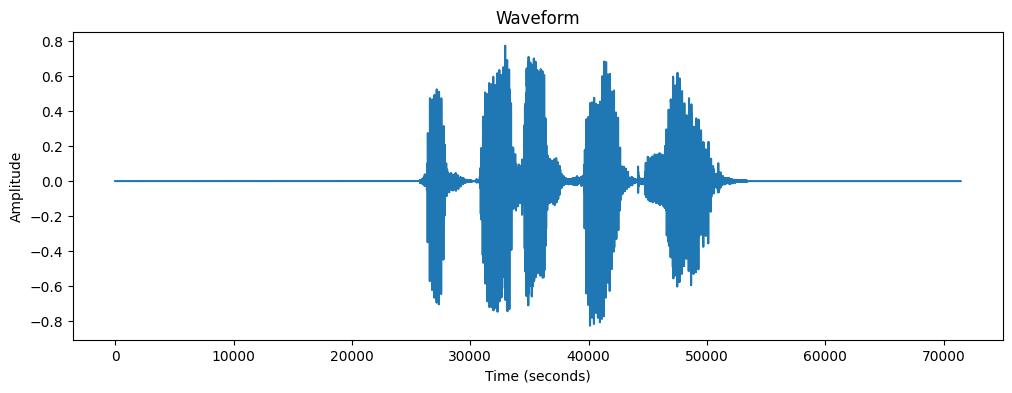

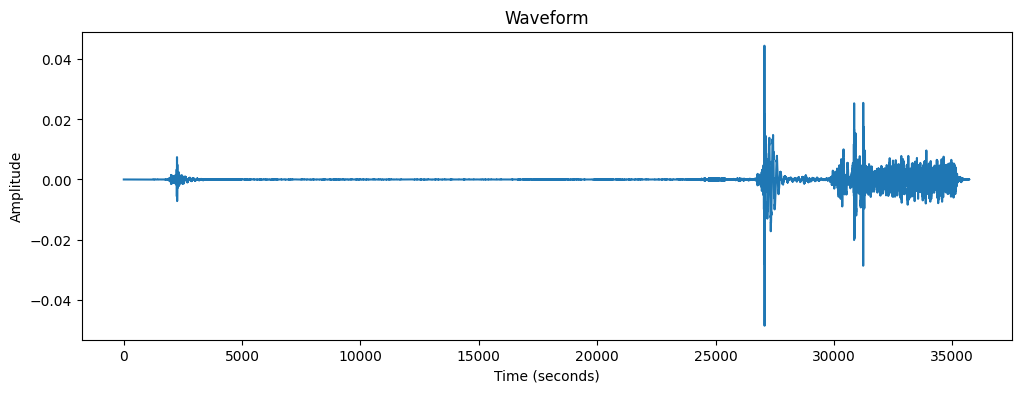

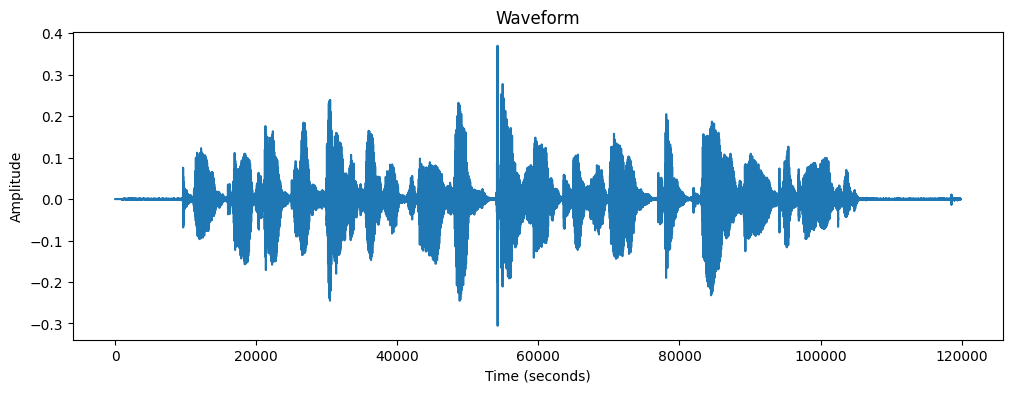

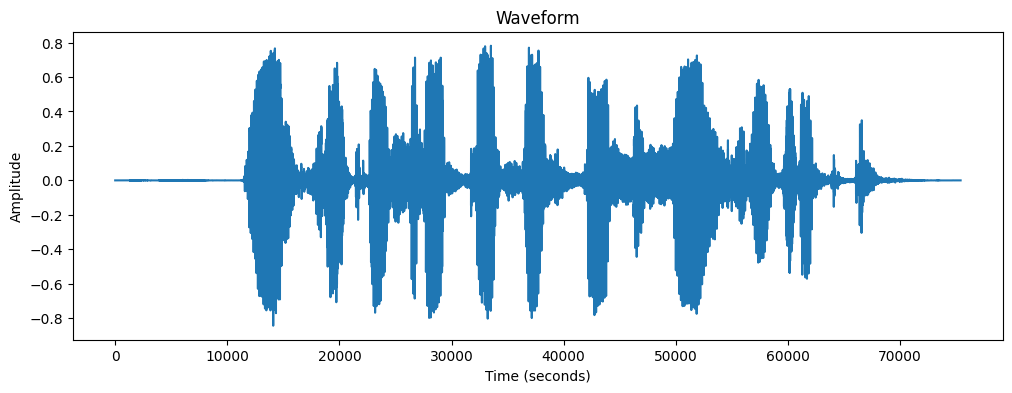

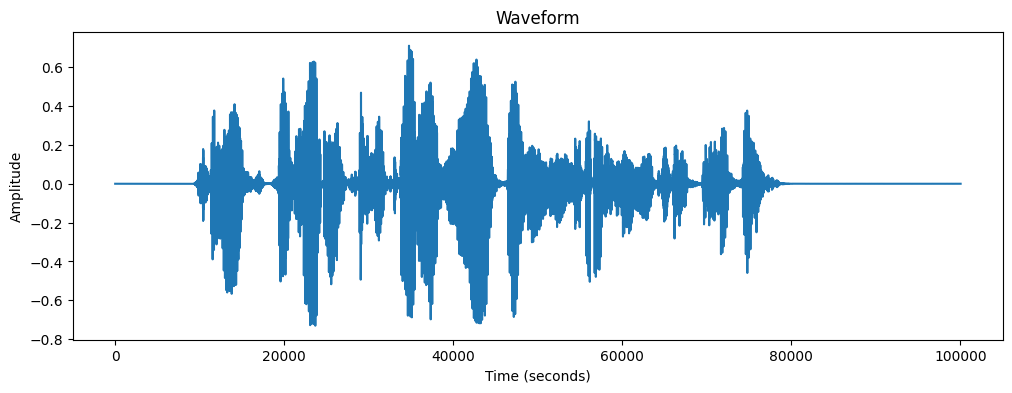

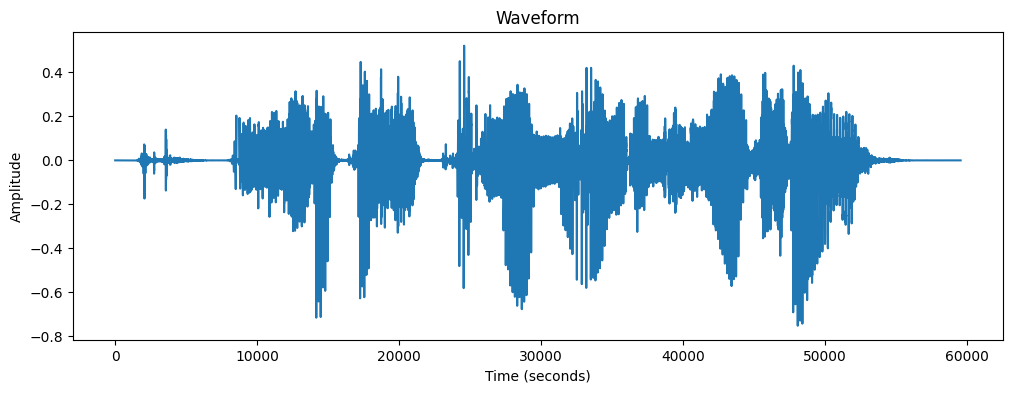

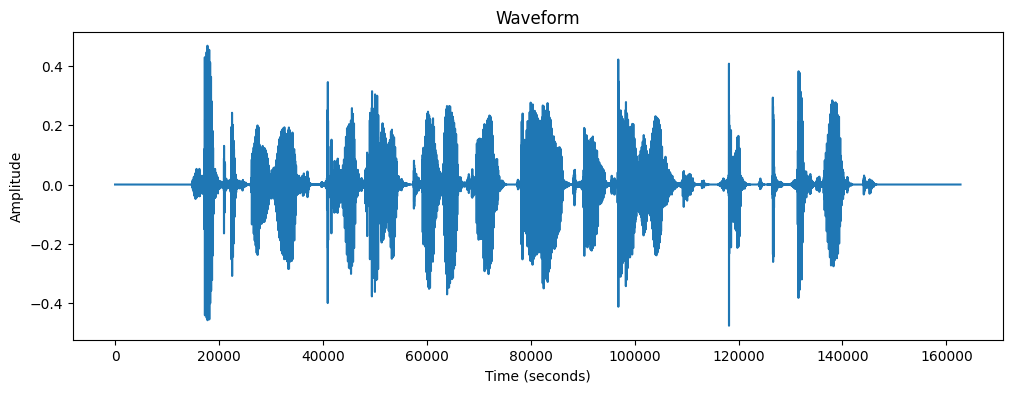

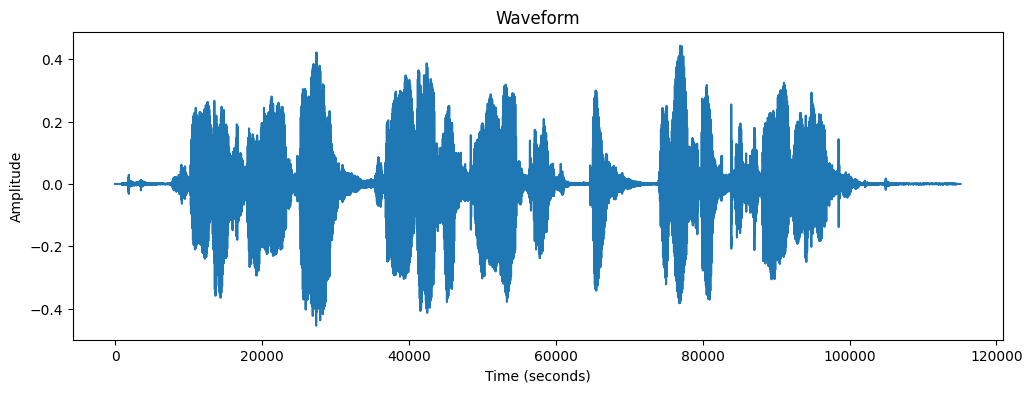

In [241]:
# Random quality assurance
random_audio = df['path'].sample(n=10).values
for x in random_audio:
    audio_file_path = os.path.join('D:/cache', x)
    y, sr = lbs.load(audio_file_path)
    time = np.linspace(0, len(y) / sr, num=len(y))
    plt.figure(figsize=(12, 4))
    plt.plot(y)
    plt.title('Waveform')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

# audio_path = ''
# plot_waveform(audio_path)

Data quality assesment(in waveforms and spectograms, after tens reloading loops) show us that in some samples exist long periods of silence or sudden rise of ampitude(maybe sudden background noise) what indicates issues with quality of dataset. And also have 1 missing transcription in dataset, as for missing audio_files dataset also lacking some mp3. For solving quality problems we need use libraries such as noisereduce, librosa, pydub(for reducing background noise, increse voise of speaker, normalize files by cutting long silence periodds) for enhancing audio qulity and maybe dropping or do not including these audio files with significant problems(such as half of recording or more in silence or impossible hear significant part of speech due backround noise) to dataset(which are not beneficial or not impossible normalize). 

In [260]:
#For savong df with column duration
df.to_csv('D:/CommonVoice/cv12.csv', index=False)